## The below code calculates the occurrence and clustering of GC-SBEs, 5bp GC-SBEs and SBEs in BMP9-induced active regions. (Figure 2G)

1. Obtain the regions 5bp GC-SBEs and SBEs are bound within BMP sensitive regions:


## The below code calculates the occurrence and clustering of GC-SBEs, 5bp GC-SBEs and SBEs in BMP9-induced active regions. (Figure 2G)

1. Number of hits per 200 bp 
    * A. motif 1,2,3 (1 vs 2,3) -- use only hit of GC-motif
    * B. motifs 4,5 -- use only hit of CAGA-motif
    * C. motifs 6-9 -- use only hit of GC-motif


In [7]:
# these are the list of interesting motifs
motif1="GGCGCC"
motif2="GGAGCC"
motif3="CCTCGG"
motif4="CAGAC"
motif5="GTCTG"
motif6="GGCGC"
motif7="GGCGG"
motif8="GGCTG"
motif9="GGCCG"

In [2]:
from Bio import SeqIO

from Bio.Seq import Seq
import re
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib
import itertools
import seaborn as sns
#from itertools import chain

In [4]:
# this function flattens the lists
from collections.abc import Iterable

def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

from Bio import SeqIO
import sys

headerList = []
seqList = []

inFile = open("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/stat_bmp9_VS_stat_cont_FC_biger_1.5_motif5_6_hits.fa.out",'r')
for record in SeqIO.parse(inFile,'fasta'):
    headerList.append(record.id)
    seqList.append(str(record.seq))

In [6]:

common_seq_dict = SeqIO.to_dict(SeqIO.parse(open("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/stat_bmp9_VS_stat_cont_FC_biger_1.5_motif5_6_hits_200.fa.out",'r'), "fasta"))

In [7]:

CAGA_seq_dict = SeqIO.to_dict(SeqIO.parse(open("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/stat_bmp9_VS_stat_cont_FC_biger_1.5_motif6_caga_hits_200.fa.out",'r'), "fasta"))

In [8]:

GCmotif_seq_dict = SeqIO.to_dict(SeqIO.parse(open("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/stat_bmp9_VS_stat_cont_FC_biger_1.5_motif5_GCmotif_hits_200.fa.out",'r'), "fasta"))

In [9]:
motif1="GGCGCC"
motif2="GGAGCC"
motif3="CCTCGG"
motif4="CAGAC"
motif5="GTCTG"
motif6="GGCGC"
motif7="GGCGG"
motif8="GGCTG"
motif9="GGCCG"

### define motif groups


In [10]:
CAGA_motifs = [motif4,motif5]
GC_5bp_motifs = [motif6,motif7,motif8,motif9]
GC_6bp_motifs_1= [motif1]
GC_6bp_motifs_2_3= [motif2, motif3]
GC_6bp_motifs=[motif1,motif2, motif3]
all_motifs=[motif1,motif2,motif3,motif4,motif5,motif6,motif7,motif8,motif9]

In [11]:
### working code!!!!
def get_motif_match_dict(seq_dict, motif_list):
    count=0
    multiple_hit_regions=[]
    motif_match_dict = dict()
    for key, value in seq_dict.items():
        #print(key)
        for m in motif_list:
            occurance_count = seq_dict[key].seq.count(m)
            #print(occurance_count)
            if occurance_count>0:
                if occurance_count == 1:
                    if key in motif_match_dict:
                        z=motif_match_dict[key]
                        z[m] = [(match.start(), match.end()) for match in re.finditer(m, str(seq_dict[key].seq))]
                        #print(z)
                        motif_match_dict[key]=z
                    else:
                        new_dict=dict()
                        for match in re.finditer(m, str(seq_dict[key].seq)):
                            new_dict[m] =[(match.start(), match.end())]
                            #print(new_dict[m])
                            motif_match_dict[key]=new_dict
                else:
                    multiple_hit_regions.append(key)
                    count=count+1
                    if key in motif_match_dict:
                        z=motif_match_dict[key]
                        z[m] = [(match.start(), match.end()) for match in re.finditer(m, str(seq_dict[key].seq))]
                        motif_match_dict[key]=z

                        #motif_match_dict[i][m] = [(match.start(), match.end()) for match in re.finditer(m, str(seq_dict[i].seq))]
                    else:    
                        
                        new_dict=dict()
                        new_dict[m] = [(match.start(), match.end()) for match in re.finditer(m, str(seq_dict[key].seq))]
                        #print(new_dict[m])
                        motif_match_dict[key] = new_dict
    return motif_match_dict
                        


        
    

In [12]:
def get_distance_between_motifs_dict(motif_match_dict):
    distance_between_motifs_dict=dict()
    for k in motif_match_dict:
        #print(k)
        motifs=list(motif_match_dict[k].keys())
        hits=list(motif_match_dict[k].values())
        values_sorted_hit_dict = dict(sorted(motif_match_dict[k].items(), key=lambda item: item[1]))
        hit_dict_values_list = sum(values_sorted_hit_dict.values(),[])
        if len(motifs)==len(hit_dict_values_list):
            if len(motifs)==1:
                continue
            if len(motifs)==2:
                # get the motifs and iterate over them by the order
                for motif_idx in range(1):
                    #print((motif[motif_idx],motif[motif_idx+1]))
                    distance = [(hit_dict_values_list[motif_idx+1][0]-hit_dict_values_list[motif_idx][1]-1)]
                    if (motifs[motif_idx],motifs[motif_idx+1]) in distance_between_motifs_dict:
                        new_dist = distance_between_motifs_dict[(motifs[motif_idx],motifs[motif_idx+1])]
                        new_dist =  new_dist + distance
                        distance_between_motifs_dict[(motifs[motif_idx],motifs[motif_idx+1])]= new_dist
                    else:
                        distance_between_motifs_dict[(motifs[motif_idx],motifs[motif_idx+1])] = distance
            if len(motifs) >2:
                dist_list =[]
                for motif_idx in range(len(motifs)-1):
                    distance = [(hit_dict_values_list[motif_idx+1][0]-hit_dict_values_list[motif_idx][1]-1)]
                    dist_list= dist_list + distance
                key_= tuple(values_sorted_hit_dict.keys())
                if key_ in distance_between_motifs_dict:
                    new_dist = list(distance_between_motifs_dict[key_])
                    new_dist = new_dist + [dist_list]
                    distance_between_motifs_dict[key_]= new_dist
                else:
                    distance_between_motifs_dict[(key_)] = [dist_list]
        if len(motifs)!=len(hit_dict_values_list):
            hit_dict_values_list = sorted(sum(values_sorted_hit_dict.values(),[]))
            dist_list =[]
            motif_tpl=[]
            for hit_idx in range(len(hit_dict_values_list)-1):
                distance = [(hit_dict_values_list[hit_idx+1][0]-hit_dict_values_list[hit_idx][1]-1)]
                dist_list=dist_list+distance
            for hit_val in hit_dict_values_list:
                for motif_ in motifs: 
                    if hit_val in motif_match_dict[k].get(motif_):
                        motif_tpl = motif_tpl+[motif_]
                    else:
                        continue
            if tuple(motif_tpl) in distance_between_motifs_dict:
                new_dist = distance_between_motifs_dict[tuple(motif_tpl)]
                new_dist = new_dist + [dist_list]
                distance_between_motifs_dict[tuple(motif_tpl)]= new_dist
            else:
                distance_between_motifs_dict[tuple(motif_tpl)]=dist_list
    return distance_between_motifs_dict


In [13]:
def get_distance_between_motifs_dict_simplified(motif_match_dict):
    distance_between_motifs_dict=dict()
    for k in motif_match_dict:
        motifs=list(motif_match_dict[k].keys())        
        hits=list(motif_match_dict[k].values())
        values_sorted_hit_dict = dict(sorted(motif_match_dict[k].items(), key=lambda item: item[1]))        
        #motifs=list(values_sorted_hit_dict[k].keys())
        hit_dict_values_list = sorted(sum(values_sorted_hit_dict.values(),[]))
        #count the distance only if there are mutliple hits 
        if len(hit_dict_values_list)>1:
#             print(k)
#             print(common_regions_GC_6bp_and_CAGA_motifs_dict[k])
#             print(motifs)
#             print(values_sorted_hit_dict)
#             print(hit_dict_values_list)
            dist_list =[]
            motif_tpl=[]
        # iterate over the sorted hit list and calculate the distances between hit positions
        # then, iterate iver the hit positions and collect the corresponding motifs and store as a tuple
        # if the tuple length is 2 --> (A,B) = (B,A)
        #otherwise, keep the occurances of motifs
            for hit_idx in range(len(hit_dict_values_list)-1):
                distance = [(hit_dict_values_list[hit_idx+1][0]-hit_dict_values_list[hit_idx][1]-1)]
                dist_list=dist_list+distance
            for hit_val in hit_dict_values_list:
                for motif_ in motifs: 
                    if hit_val in motif_match_dict[k].get(motif_):
                        motif_tpl = motif_tpl+[motif_]
                    else:
                        continue
            if len(tuple(motif_tpl))==2:
                two_motif_tuple = tuple(sorted(tuple(motif_tpl)))
                if two_motif_tuple in distance_between_motifs_dict:
                    new_dist = distance_between_motifs_dict[two_motif_tuple]
                    new_dist = new_dist + [dist_list]
                    distance_between_motifs_dict[two_motif_tuple]= new_dist
                else:
                    distance_between_motifs_dict[two_motif_tuple]=dist_list
            else:    
                if tuple(motif_tpl) in distance_between_motifs_dict:
                    new_dist = distance_between_motifs_dict[tuple(motif_tpl)]
                    new_dist = new_dist + [dist_list]
                    distance_between_motifs_dict[tuple(motif_tpl)]= new_dist
                else:
                    distance_between_motifs_dict[tuple(motif_tpl)]=dist_list
    return distance_between_motifs_dict

## I ignore the negative occurances for the pairwise diatnces but not for all combinatorial distance. Also, I don't also check this for the hits

In [14]:
def get_pairwise_distance_between_motifs_dict_simplified(motif_match_dict):
    distance_between_motifs_dict=dict()
    for k in motif_match_dict:       
        motifs=list(motif_match_dict[k].keys())   
        hits=list(motif_match_dict[k].values())
        values_sorted_hit_dict = dict(sorted(motif_match_dict[k].items(), key=lambda item: item[1]))
        hit_dict_values_list = sorted(sum(values_sorted_hit_dict.values(),[]))       
        if len(hit_dict_values_list)>1:
            dist_list =[]
            motif_tpl=[]
            for hit_idx in range(len(hit_dict_values_list)-1):
                distance = [(hit_dict_values_list[hit_idx+1][0]-hit_dict_values_list[hit_idx][1]-1)]
                dist_list=dist_list+distance
            for hit_val in hit_dict_values_list:
                for motif_ in motifs: 
                    if hit_val in motif_match_dict[k].get(motif_):
                        motif_tpl = motif_tpl+[motif_]
                    else:
                        continue
            for tup_idx in range(len(motif_tpl)-1):
                tuple_pair = tuple(sorted(tuple((motif_tpl[tup_idx],motif_tpl[tup_idx+1]))))
                pairwise_dist=[dist_list[tup_idx]]
                if pairwise_dist[0] > 0:
                    if tuple_pair in distance_between_motifs_dict:
                        new_dist = distance_between_motifs_dict[tuple_pair]
                        new_dist = new_dist + [pairwise_dist]
                        distance_between_motifs_dict[tuple_pair]= new_dist
                    else:
                        distance_between_motifs_dict[tuple_pair]=pairwise_dist
    return distance_between_motifs_dict

## COMMON HITS

In [15]:
common_motif_match_dict=  get_motif_match_dict(common_seq_dict, all_motifs)

In [16]:
distance_between_all_motifs_dict=get_distance_between_motifs_dict(common_motif_match_dict)

In [17]:
distance_between_all_motifs_dict

{('GTCTG', 'GGCTG', 'GTCTG', 'GGCTG', 'GTCTG', 'GGCTG'): [7, 24, 1, 29, 15],
 ('CAGAC', 'GTCTG', 'CAGAC'): [23, 4],
 ('GGAGCC', 'GTCTG'): [8, 4],
 ('CAGAC', 'GTCTG', 'GTCTG', 'GGCTG'): [4, 48, 86],
 ('GTCTG', 'GGCTG'): [-2, 94],
 ('CAGAC', 'CAGAC'): [71],
 ('GTCTG', 'GGCTG', 'GGCGG'): [[25, 55]],
 ('GGAGCC', 'CAGAC'): [65],
 ('GGCTG', 'GGCTG', 'GTCTG', 'GGCTG', 'GGAGCC', 'GGAGCC'): [14, 11, -2, 8, 4],
 ('GGCTG', 'GTCTG', 'GGAGCC', 'GTCTG'): [93, -2, 3],
 ('CAGAC', 'CAGAC', 'GGCTG'): [84, 5],
 ('GGAGCC', 'GGCTG', 'GTCTG', 'GGCGC'): [[0, 10, 29]],
 ('CAGAC', 'CAGAC', 'GGAGCC'): [70, 4],
 ('GGCTG', 'GGAGCC', 'GTCTG', 'GGCTG'): [2, 42, 28],
 ('GGAGCC', 'GGAGCC'): [17],
 ('GGCTG', 'CAGAC', 'CAGAC', 'GGAGCC', 'GTCTG'): [71, 52, 19, 4],
 ('GGCTG', 'GGCTG', 'GTCTG', 'CAGAC', 'GGCTG'): [16, 56, 37, 10]}

## CAGA motif 

In [18]:
CAGA_motif_match_dict=  get_motif_match_dict(CAGA_seq_dict, CAGA_motifs)

In [19]:
distance_between_CAGA_motifs_dict=get_distance_between_motifs_dict(CAGA_motif_match_dict)

In [20]:
distance_between_CAGA_motifs_dict

{('GTCTG', 'GTCTG', 'GTCTG'): [37, 36],
 ('CAGAC', 'CAGAC'): [36, [71], [24], [84], [70], [49], [84]],
 ('GTCTG', 'CAGAC', 'CAGAC'): [1, 7],
 ('CAGAC', 'GTCTG', 'CAGAC'): [23, 4],
 ('CAGAC', 'GTCTG', 'GTCTG'): [4, 48],
 ('GTCTG', 'GTCTG'): [8, [80], [2]],
 ('CAGAC', 'GTCTG'): [85, 85, 37],
 ('CAGAC', 'CAGAC', 'GTCTG'): [52, 30]}

## GC motif

### A. 6 BP MOTIFS
    motif 1,2,3 (1 vs 2,3) -- use only hit of GC-motif

CAGA_motifs = [motif4,motif5]
GC_5bp_motifs = [motif6,motif7,motif8,motif9]
GC_6bp_motifs_1= [motif1]
GC_6bp_motifs_2_3= [motif2, motif3]
GC_6bp_motifs=[motif1,motif2, motif3]
all_motifs=[motif1,motif2,motif3,motif4,motif5,motif6,motif7,motif8,motif9]

In [21]:
GC_6bp_motifs_1_match_dict = get_motif_match_dict(GCmotif_seq_dict, GC_6bp_motifs_1)

In [22]:
distance_between_GC_6bp_motifs_1_dict = get_distance_between_motifs_dict(GC_6bp_motifs_1_match_dict)


In [23]:
GC_6bp_motifs_2_3_match_dict= get_motif_match_dict(GCmotif_seq_dict, GC_6bp_motifs_2_3)

In [24]:
distance_between_GC_6bp_motifs_2_3_dict = get_distance_between_motifs_dict(GC_6bp_motifs_2_3_match_dict)


In [25]:
GC_6bp_motifs_match_dict= get_motif_match_dict(GCmotif_seq_dict, GC_6bp_motifs)

In [26]:
distance_between_all_GC_6bp_motifs_dict = get_distance_between_motifs_dict(GC_6bp_motifs_match_dict)


In [27]:
distance_between_all_GC_6bp_motifs_dict

{('GGAGCC', 'GGAGCC'): [4, [17]]}

### C. 5 BP MOTIFS 
    motifs 6-9 -- use only hit of GC-motif

In [28]:
GC_5bp_motifs_match_dict = get_motif_match_dict(GCmotif_seq_dict, GC_5bp_motifs)

In [29]:
GC_5bp_motifs_match_dict

{'chr22:28714257-28714457': {'GGCTG': [(186, 191)]},
 'chr2:96147043-96147243': {'GGCTG': [(40, 45), (77, 82), (133, 138)]},
 'chr2:223122795-223122995': {'GGCTG': [(9, 14)]},
 'chr10:110145010-110145210': {'GGCTG': [(88, 93)]},
 'chr3:63927769-63927969': {'GGCTG': [(181, 186)]},
 'chr5:131177260-131177460': {'GGCTG': [(8, 13)]},
 'chr10:78656831-78657031': {'GGCGG': [(138, 143)], 'GGCTG': [(77, 82)]},
 'chr10:53007109-53007309': {'GGCTG': [(56, 61)]},
 'chr18:49524488-49524688': {'GGCTG': [(65, 70), (85, 90), (106, 111)]},
 'chr6:9624167-9624367': {'GGCGC': [(47, 52)]},
 'chr7:114947809-114948009': {'GGCTG': [(160, 165), (187, 192)]},
 'chr1:64217179-64217379': {'GGCGC': [(97, 102)]},
 'chr4:125795119-125795319': {'GGCTG': [(37, 42)]},
 'chr18:40925354-40925554': {'GGCTG': [(1, 6)]},
 'chr3:64352275-64352475': {'GGCTG': [(104, 109)]},
 'chr6:134513031-134513231': {'GGCGC': [(115, 120)], 'GGCTG': [(64, 69)]},
 'chr7:66789752-66789952': {'GGCTG': [(81, 86)]},
 'chr6:104702533-104702733'

In [30]:
distance_between_GC_5bp_motifs_dict = get_distance_between_motifs_dict(GC_5bp_motifs_match_dict)

In [31]:
distance_between_GC_5bp_motifs_dict

{('GGCTG', 'GGCTG', 'GGCTG'): [31, 50, [14, 15], [16, 115]],
 ('GGCGG', 'GGCTG'): [55],
 ('GGCTG', 'GGCTG'): [21, [85]],
 ('GGCGC', 'GGCTG'): [45]}

In [32]:
GC_6bp_motifs_2_3_match_dict

{'chrX:37457504-37457704': {'GGAGCC': [(117, 123)]},
 'chr4:80126887-80127087': {'GGAGCC': [(134, 140)]},
 'chr18:45156769-45156969': {'GGAGCC': [(107, 113)]},
 'chr2:84991869-84992069': {'GGAGCC': [(194, 200)]},
 'chr2:154130979-154131179': {'GGAGCC': [(82, 88)]},
 'chr12:92076910-92077110': {'GGAGCC': [(130, 136)]},
 'chr11:124302824-124303024': {'GGAGCC': [(115, 121)]},
 'chr5:170651454-170651654': {'GGAGCC': [(108, 114)]},
 'chr5:32268677-32268877': {'GGAGCC': [(82, 88)]},
 'chr18:49524488-49524688': {'GGAGCC': [(120, 126), (131, 137)]},
 'chr5:72129750-72129950': {'GGAGCC': [(166, 172)]},
 'chr10:60483853-60484053': {'GGAGCC': [(134, 140)]},
 'chr4:125795119-125795319': {'GGAGCC': [(84, 90)]},
 'chr18:40925354-40925554': {'GGAGCC': [(104, 110)]},
 'chr6:134513031-134513231': {'GGAGCC': [(57, 63)]},
 'chr1:64518787-64518987': {'GGAGCC': [(81, 87)]},
 'chr6:125667622-125667822': {'GGAGCC': [(136, 142)]},
 'chr6:104702533-104702733': {'GGAGCC': [(18, 24)]},
 'chr5:56282388-56282588':

## PLOT:

1. Number of hits per 200 bp ( can we somehow calculate significance)
    * A. motif 1,2,3 (1 vs 2,3) -- use only hit of GC-motif
    * B. motifs 4,5 -- use only hit of CAGA-motif
    * C. motifs 6-9 -- use only hit of GC-motif
    
2.  create a stacked bar plotwith the categories below
    - CAGA_motif_match_dict
    - GC_6bp_motifs_1_match_dict
    - GC_6bp_motifs_2_3_match_dict
    - GC_5bp_motifs_match_dict


In [33]:
def from_dict_to_counts(motif_match_dict):
    motif_match_df = pd.DataFrame.from_dict(motif_match_dict)
    motif_match_df = motif_match_df.fillna(0)
    motif_match_df_count = motif_match_df.copy()
    for row_idx in range(motif_match_df.shape[0]):
        for col_idx in range(motif_match_df.shape[1]):
            if isinstance(motif_match_df.iloc[row_idx,col_idx],list):
                motif_match_df_count.iloc[row_idx,col_idx] = len(motif_match_df.iloc[row_idx,col_idx])
            else:
                motif_match_df_count.iloc[row_idx,col_idx] =motif_match_df.iloc[row_idx,col_idx]
    return motif_match_df_count
        
                         

In [34]:
def motif_count_to_count_groups(match_count_df, total_num_regions, motif_name):
    match_count_df = pd.DataFrame(match_count_df.sum(), columns=["motif_count"])
    col_name = match_count_df.columns
    count_group_df=pd.DataFrame(columns=['count'],index=["0","1","2","2+"])
    zeros= total_num_regions - match_count_df.shape[0]
    ones= match_count_df.loc[match_count_df['motif_count'] ==1].shape[0]
    twos= match_count_df.loc[match_count_df['motif_count'] ==2].shape[0]
    biggerThanTwo= match_count_df.loc[match_count_df['motif_count'] >2].shape[0]
    count_group_df.loc['0','count'] = zeros
    count_group_df.loc['1','count'] =ones
    count_group_df.loc['2','count'] =twos
    count_group_df.loc['2+','count'] =biggerThanTwo
    count_group_df.columns = [motif_name + "_count"]
    return count_group_df

In [35]:
CAGA_motif_match_count_df =from_dict_to_counts(CAGA_motif_match_dict)

In [36]:
CAGA_count = motif_count_to_count_groups(CAGA_motif_match_count_df,424, "CAGA")
CAGA_count

,CAGA_count
0,344
1,62
2,13
2+,5


In [37]:
GC_6bp_motifs_1_match_count_df =from_dict_to_counts(GC_6bp_motifs_1_match_dict)
GC_6bp_motifs_1_count = motif_count_to_count_groups(GC_6bp_motifs_1_match_count_df,424, "GC_6bp_motifs_1")
GC_6bp_motifs_1_count


,GC_6bp_motifs_1_count
0,421
1,3
2,0
2+,0


In [38]:
GC_6bp_motifs_2_3_match_count_df =from_dict_to_counts(GC_6bp_motifs_2_3_match_dict)
GC_6bp_motifs_2_3_count = motif_count_to_count_groups(GC_6bp_motifs_2_3_match_count_df,424, "GC_6bp_motifs_2_3")
GC_6bp_motifs_2_3_count

,GC_6bp_motifs_2_3_count
0,399
1,23
2,2
2+,0


In [39]:
GC_6bp_motifs_match_count_df =from_dict_to_counts(GC_6bp_motifs_match_dict)
GC_6bp_count = motif_count_to_count_groups(GC_6bp_motifs_match_count_df,424, "GC_6bp")
GC_6bp_count

,GC_6bp_count
0,396
1,26
2,2
2+,0


In [40]:

GC_5bp_motifs_match_count_df =from_dict_to_counts(GC_5bp_motifs_match_dict)
GC_5bp_count = motif_count_to_count_groups(GC_5bp_motifs_match_count_df,424, "GC_5bp")
GC_5bp_count

,GC_5bp_count
0,397
1,20
2,4
2+,3


In [41]:
motif_occurance_counts = pd.concat([CAGA_count, GC_6bp_motifs_1_count,GC_6bp_motifs_2_3_count,GC_6bp_count,GC_5bp_count], axis=1)
motif_occurance_counts

,CAGA_count,GC_6bp_motifs_1_count,GC_6bp_motifs_2_3_count,GC_6bp_count,GC_5bp_count
0,344,421,399,396,397
1,62,3,23,26,20
2,13,0,2,2,4
2+,5,0,0,0,3


In [42]:
motif_occurance_counts.to_csv("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/outs/motif_occurance_counts.csv")

In [43]:
motif_occurance_counts['CAGA_count'].sum()

424

In [45]:
motif_occurance_perc_df = pd.DataFrame([100 *  motif_occurance_counts[i]/motif_occurance_counts[i].sum() for i in motif_occurance_counts.columns]).T
motif_occurance_perc_df

,CAGA_count,GC_6bp_motifs_1_count,GC_6bp_motifs_2_3_count,GC_6bp_count,GC_5bp_count
0,81.132075,99.292453,94.103774,93.396226,93.632075
1,14.622642,0.707547,5.424528,6.132075,4.716981
2,3.066038,0.000000,0.471698,0.471698,0.943396
2+,1.179245,0.000000,0.000000,0.000000,0.707547


In [46]:
motif_occurance_perc_df.to_csv("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/outs/motif_occurance_perc_df.csv")

In [ ]:
min_val, max_val = 0.2,1.0

n = 4
orig_cmap = plt.cm.Blues
colors = orig_cmap(np.linspace(min_val, max_val, n))
blue_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

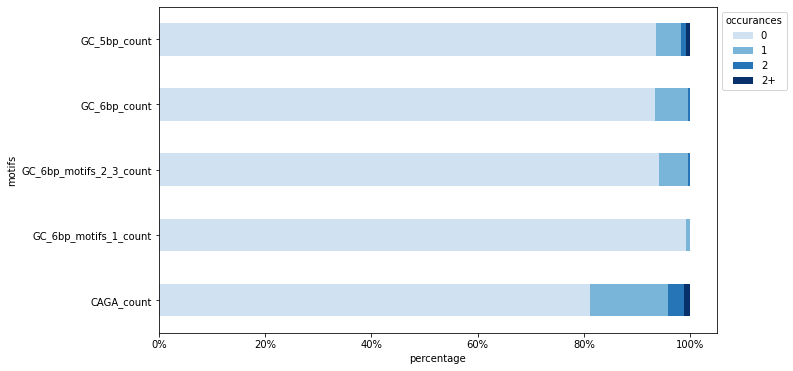

In [50]:
ax = df.plot(kind='barh', stacked=True, figsize=(10, 6),colormap=blue_cmap)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.set_xlabel('percentage',)
ax.set_xlabel('percentage')
#ax.invert_yaxis() 
plt.legend(title='occurances', bbox_to_anchor=(1.0, 1), loc='upper left')
# plt.savefig('stacked.png')  # if needed
plt.show()

### without 0 

<Figure size 1440x1440 with 0 Axes>

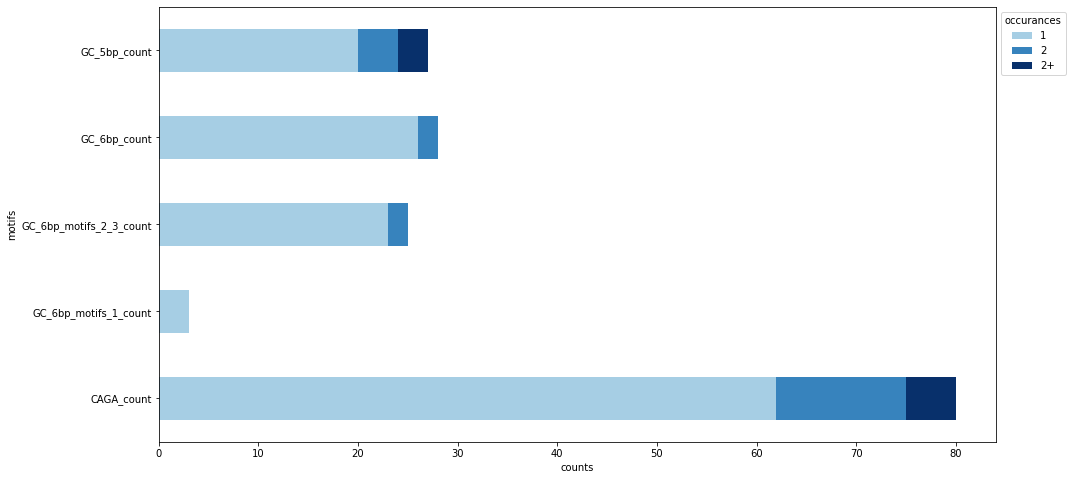

In [56]:
plt.figure(figsize=(20,20))
X_AXIS = list(motif_occurance_counts.columns)
min_val, max_val = 0.35,1.0
data = { 
        '1' : tuple(motif_occurance_counts.iloc[1,:]),
        '2' : tuple(motif_occurance_counts.iloc[2,:]),
        '2+' : tuple(motif_occurance_counts.iloc[3,:])
}
df = pd.DataFrame(data, index=index)
n = 4
orig_cmap = plt.cm.Blues
colors = orig_cmap(np.linspace(min_val, max_val, n))
blue_cmap_dark = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

ax = df.plot(kind='barh', stacked=True, figsize=(15,8),colormap=blue_cmap_dark)
# fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
# xticks = mtick.FormatStrFormatter(fmt)
# ax.xaxis.set_major_formatter(xticks)
ax.set_xlabel('counts',)
#ax.invert_yaxis() 
plt.legend(title='occurances', bbox_to_anchor=(1.0, 1), loc='upper left')
# plt.savefig('stacked.png')  # if needed
plt.savefig("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/figures/motif_occurance_00.png",
          format='png',dpi=750,bbox_inches='tight')
plt.show()

In [59]:
motif_occurance_counts

,CAGA_count,GC_6bp_motifs_1_count,GC_6bp_motifs_2_3_count,GC_6bp_count,GC_5bp_count
0,344,421,399,396,397
1,62,3,23,26,20
2,13,0,2,2,4
2+,5,0,0,0,3


In [60]:
motif_occurance_perc_df

,CAGA_count,GC_6bp_motifs_1_count,GC_6bp_motifs_2_3_count,GC_6bp_count,GC_5bp_count
0,81.132075,99.292453,94.103774,93.396226,93.632075
1,14.622642,0.707547,5.424528,6.132075,4.716981
2,3.066038,0.000000,0.471698,0.471698,0.943396
2+,1.179245,0.000000,0.000000,0.000000,0.707547


<Figure size 1440x1440 with 0 Axes>

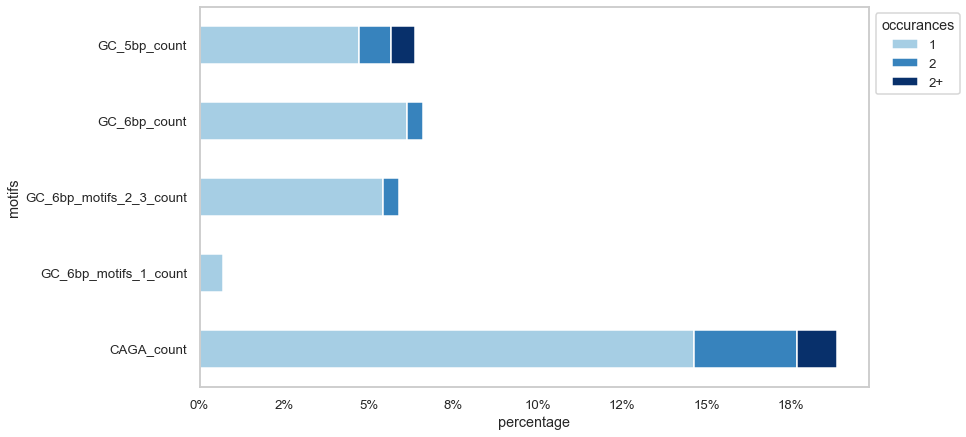

In [61]:
plt.figure(figsize=(20,20))
X_AXIS = list(motif_occurance_perc_df.columns)

data = { 
        '1' : tuple(motif_occurance_perc_df.iloc[1,:]),
        '2' : tuple(motif_occurance_perc_df.iloc[2,:]),
        '2+' : tuple(motif_occurance_perc_df.iloc[3,:])
}
df = pd.DataFrame(data, index=index)
n = 4
orig_cmap = plt.cm.Blues
colors = orig_cmap(np.linspace(min_val, max_val, n))
blue_cmap_dark = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

ax = df.plot(kind='barh', stacked=True, figsize=(12, 7),colormap=blue_cmap_dark)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.set_xlabel('percentage',)
#ax.invert_yaxis() 
plt.legend(title='occurances', bbox_to_anchor=(1.0, 1), loc='upper left')
# plt.savefig('stacked.png')  # if needed
plt.savefig("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/figures/motif_occurance_perc_001.png",
         format='png',dpi=750,bbox_inches='tight')
plt.show()

<Figure size 1440x1440 with 0 Axes>

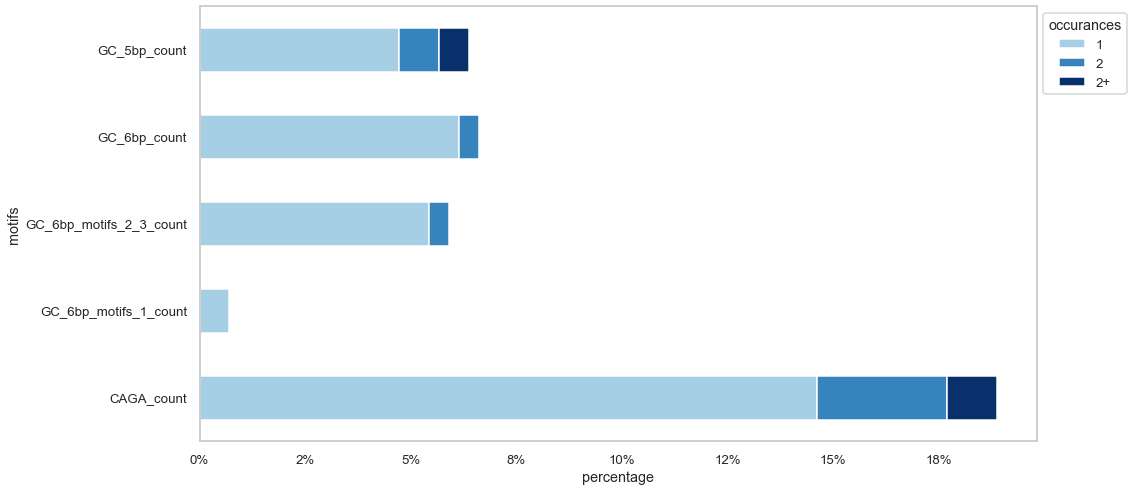

In [62]:
plt.figure(figsize=(20,20))
X_AXIS = list(motif_occurance_perc_df.columns)

data = { 
        '1' : tuple(motif_occurance_perc_df.iloc[1,:]),
        '2' : tuple(motif_occurance_perc_df.iloc[2,:]),
        '2+' : tuple(motif_occurance_perc_df.iloc[3,:])
}
df = pd.DataFrame(data, index=index)
n = 4
orig_cmap = plt.cm.Blues
colors = orig_cmap(np.linspace(min_val, max_val, n))
blue_cmap_dark = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

ax = df.plot(kind='barh', stacked=True, figsize=(15, 8),colormap=blue_cmap_dark)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.set_xlabel('percentage',)
#ax.invert_yaxis() 
plt.legend(title='occurances', bbox_to_anchor=(1.0, 1), loc='upper left')
# plt.savefig('stacked.png')  # if needed
plt.savefig("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/figures/motif_occurance_perc.png",
         format='png',dpi=750,bbox_inches='tight')
plt.show()

## THIS PART IS NOT INCLUDED IN THE MANUSCROPT BUT MIGHT BE INTERESTING FOR THE PEOPLE:

## ___________________________________________________________________________________________________________________________________________
## ___________________________________________________________________________________________________________________________________________
## ___________________________________________________________________________________________________________________________________________


___________________________________________________________________________________________________________________________________________

## 2. mean distance between:
1. Number of hits per 200 bp ( can we somehow calculate significance)
    * A. motif 1,2,3 (1 vs 2,3) -- use only hit of GC-motif
    * B. motifs 4,5 -- use only hit of CAGA-motif
    * C. motifs 6-9 -- use only hit of GC-motif

####     * A-A (1 vs 2,3) -- use only hit of GC-motif
####     * A-B -- intersection of GC-motif and CAGA-motif
####     * B-C -- intersection of GC-motif and CAGA-motif
####     * C-C -- use only hit of GC-motif
     

###     * A-A (1 vs 2,3) -- use only hit of GC-motif

In [85]:
GC_6bp_motifs_1_match_dict

{'chr6:9624167-9624367': {'GGCGCC': [(47, 53)]},
 'chr1:64217179-64217379': {'GGCGCC': [(97, 103)]},
 'chr2:138023423-138023623': {'GGCGCC': [(119, 125)]}}

In [86]:
GC_6bp_motifs_2_3_match_dict


{'chrX:37457504-37457704': {'GGAGCC': [(117, 123)]},
 'chr4:80126887-80127087': {'GGAGCC': [(134, 140)]},
 'chr18:45156769-45156969': {'GGAGCC': [(107, 113)]},
 'chr2:84991869-84992069': {'GGAGCC': [(194, 200)]},
 'chr2:154130979-154131179': {'GGAGCC': [(82, 88)]},
 'chr12:92076910-92077110': {'GGAGCC': [(130, 136)]},
 'chr11:124302824-124303024': {'GGAGCC': [(115, 121)]},
 'chr5:170651454-170651654': {'GGAGCC': [(108, 114)]},
 'chr5:32268677-32268877': {'GGAGCC': [(82, 88)]},
 'chr18:49524488-49524688': {'GGAGCC': [(120, 126), (131, 137)]},
 'chr5:72129750-72129950': {'GGAGCC': [(166, 172)]},
 'chr10:60483853-60484053': {'GGAGCC': [(134, 140)]},
 'chr4:125795119-125795319': {'GGAGCC': [(84, 90)]},
 'chr18:40925354-40925554': {'GGAGCC': [(104, 110)]},
 'chr6:134513031-134513231': {'GGAGCC': [(57, 63)]},
 'chr1:64518787-64518987': {'GGAGCC': [(81, 87)]},
 'chr6:125667622-125667822': {'GGAGCC': [(136, 142)]},
 'chr6:104702533-104702733': {'GGAGCC': [(18, 24)]},
 'chr5:56282388-56282588':

##### GC_6bp_motifs_1_match_dict --> only has single hits

In [87]:
distance_between_all_GC_6bp_motifs_dict

{('GGAGCC', 'GGAGCC'): [4, [17]]}

In [65]:
distance_between_all_GC_6bp_motifs_list = list(flatten(list(distance_between_all_GC_6bp_motifs_dict.values())))
distance_between_all_GC_6bp_motifs_list

[4, 17]

In [68]:
#distance_between_CAGA_motifs_list = list(flatten(list(distance_between_CAGA_motifs_dict.values())))
#distance_between_CAGA_motifs_list


###     * A-B -- intersection of GC-motif and CAGA-motif
* motif1 VS motif4 & motif5
* motif2 & motif3  VS motif4 & motif5

In [66]:
motif1="GGCGCC"
motif2="GGAGCC"
motif3="CCTCGG"
motif4="CAGAC"
motif5="GTCTG"
motif6="GGCGC"
motif7="GGCGG"
motif8="GGCTG"
motif9="GGCCG"

In [67]:
motif_dict = {"motif1":"GGCGCC","motif2":"GGAGCC","motif3":"CCTCGG","motif4":"CAGAC","motif5":"GTCTG","motif6":"GGCGC","motif7":"GGCGG","motif8":"GGCTG","motif9":"GGCCG"}

### define motif groups


In [68]:
# CAGA_motifs = [motif4,motif5]
# GC_5bp_motifs = [motif6,motif7,motif8,motif9]
# GC_6bp_motifs_1= [motif1]
# GC_6bp_motifs_2_3= [motif2, motif3]
# GC_6bp_motifs=[motif1,motif2, motif3]
# all_motifs=[motif1,motif2,motif3,motif4,motif5,motif6,motif7,motif8,motif9]
GC_6bp_and_CAGA_motifs = [motif1,motif2,motif3,motif4,motif5]
GC_5bp_and_CAGA_motifs = [motif4,motif5,motif6,motif7,motif8,motif9]


In [69]:
common_regions_GC_6bp_and_CAGA_motifs_dict = get_motif_match_dict(common_seq_dict, GC_6bp_and_CAGA_motifs)

In [70]:
common_regions_GC_6bp_and_CAGA_motifs_dict

{'chr8:119193834-119194034': {'CAGAC': [(113, 118)]},
 'chr2:96147043-96147243': {'GTCTG': [(27, 32), (70, 75), (112, 117)]},
 'chr2:173249949-173250149': {'GTCTG': [(58, 63)]},
 'chr12:71007046-71007246': {'CAGAC': [(75, 80)]},
 'chr4:133657981-133658181': {'GTCTG': [(115, 120)]},
 'chr11:86474099-86474299': {'CAGAC': [(37, 42), (76, 81)],
  'GTCTG': [(66, 71)]},
 'chr4:80126887-80127087': {'GGAGCC': [(134, 140)], 'GTCTG': [(120, 125)]},
 'chr18:45156769-45156969': {'GGAGCC': [(107, 113)], 'GTCTG': [(118, 123)]},
 'chr1:208837070-208837270': {'GTCTG': [(148, 153)]},
 'chr3:63927769-63927969': {'CAGAC': [(25, 30)],
  'GTCTG': [(35, 40), (89, 94)]},
 'chr7:80298336-80298536': {'GTCTG': [(100, 105)]},
 'chr5:131177260-131177460': {'GTCTG': [(4, 9)]},
 'chr3:174094719-174094919': {'CAGAC': [(91, 96), (168, 173)]},
 'chr10:78656831-78657031': {'GTCTG': [(46, 51)]},
 'chr11:124302824-124303024': {'GGAGCC': [(115, 121)], 'CAGAC': [(187, 192)]},
 'chr3:64361519-64361719': {'CAGAC': [(89, 94)]

In [71]:
(get_distance_between_motifs_dict_simplified(common_regions_GC_6bp_and_CAGA_motifs_dict))

{('GTCTG', 'GTCTG', 'GTCTG'): [37, 36],
 ('CAGAC', 'GTCTG', 'CAGAC'): [23, 4],
 ('GGAGCC', 'GTCTG'): [8, [4], [16], [42]],
 ('CAGAC', 'GTCTG', 'GTCTG'): [4, 48],
 ('CAGAC', 'CAGAC'): [71, [84]],
 ('CAGAC', 'GGAGCC'): [65],
 ('GTCTG', 'GGAGCC', 'GGAGCC'): [12, 4],
 ('GTCTG', 'GGAGCC', 'GTCTG'): [-2, 3],
 ('CAGAC', 'CAGAC', 'GGAGCC'): [70, 4],
 ('GGAGCC', 'GGAGCC'): [17],
 ('CAGAC', 'CAGAC', 'GGAGCC', 'GTCTG'): [52, 19, 4],
 ('CAGAC', 'GTCTG'): [37]}

In [72]:
pairwise_dist_GC_6bp_and_CAGA_motifs_dict = get_pairwise_distance_between_motifs_dict_simplified(common_regions_GC_6bp_and_CAGA_motifs_dict)

In [73]:
pairwise_dist_GC_6bp_and_CAGA_motifs_dict

{('GTCTG', 'GTCTG'): [37, [36], [48]],
 ('CAGAC', 'GTCTG'): [23, [4], [4], [37]],
 ('GGAGCC', 'GTCTG'): [8, [4], [12], [3], [16], [42], [4]],
 ('CAGAC', 'CAGAC'): [71, [84], [70], [52]],
 ('CAGAC', 'GGAGCC'): [65, [4], [19]],
 ('GGAGCC', 'GGAGCC'): [4, [17]]}

In [74]:
# which pairs I have?
for tp in pairwise_dist_GC_6bp_and_CAGA_motifs_dict.keys():
    print(tp)
    for i in tp:
        #print(i)
        print(list(motif_dict.keys())[list(motif_dict.values()).index(i)])


('GTCTG', 'GTCTG')
motif5
motif5
('CAGAC', 'GTCTG')
motif4
motif5
('GGAGCC', 'GTCTG')
motif2
motif5
('CAGAC', 'CAGAC')
motif4
motif4
('CAGAC', 'GGAGCC')
motif4
motif2
('GGAGCC', 'GGAGCC')
motif2
motif2


In [75]:
#motif1_motif_5_dist = pairwise_dist_GC_6bp_and_CAGA_motifs_dict[('GGCGCC', 'GTCTG')]

In [76]:
motif2_motif_5_dist = pairwise_dist_GC_6bp_and_CAGA_motifs_dict[('GGAGCC', 'GTCTG')]
motif2_motif_5_dist

[8, [4], [12], [3], [16], [42], [4]]

In [77]:
import statistics
statistics.mean(list(flatten(motif2_motif_5_dist))) 

12.714285714285714

In [78]:
motif2_motif_4_dist = pairwise_dist_GC_6bp_and_CAGA_motifs_dict[('CAGAC', 'GGAGCC')]
motif2_motif_4_dist

[65, [4], [19]]

In [79]:
statistics.mean(list(flatten(motif2_motif_4_dist))) 

29.333333333333332

In [80]:
pairwise_dist_GC_6bp_and_CAGA_motifs_list = list((flatten(motif2_motif_5_dist+motif2_motif_4_dist)))

In [81]:
pairwise_dist_GC_6bp_and_CAGA_motifs_list

[8, 4, 12, 3, 16, 42, 4, 65, 4, 19]

###     * B-C -- intersection of GC-motif and CAGA-motif
* motif4 & motif5 VS motifs6-9

In [82]:
GC_5bp_and_CAGA_motifs = [motif4,motif5,motif6,motif7,motif8,motif9]

In [83]:
common_regions_GC_5bp_and_CAGA_motifs_dict = get_motif_match_dict(common_seq_dict, GC_5bp_and_CAGA_motifs)

In [84]:
pairwise_dist_GC_5bp_and_CAGA_motifs_dict = get_pairwise_distance_between_motifs_dict_simplified(common_regions_GC_5bp_and_CAGA_motifs_dict)
pairwise_dist_GC_5bp_and_CAGA_motifs_dict

{('GGCTG', 'GTCTG'): [7,
  [24],
  [1],
  [29],
  [15],
  [86],
  [25],
  [11],
  [93],
  [10],
  [51],
  [28],
  [94],
  [56]],
 ('CAGAC', 'GTCTG'): [23, [4], [4], [30], [37]],
 ('GTCTG', 'GTCTG'): [48, [8]],
 ('CAGAC', 'CAGAC'): [71, [84], [70], [52]],
 ('GGCGG', 'GGCTG'): [55],
 ('GGCTG', 'GGCTG'): [14, [16]],
 ('CAGAC', 'GGCTG'): [5, [71], [10]],
 ('GGCGC', 'GTCTG'): [29]}

In [85]:
# which pairs I have?
for tp in pairwise_dist_GC_5bp_and_CAGA_motifs_dict.keys():
    print(tp)
    for i in tp:
        #print(i)
        print(list(motif_dict.keys())[list(motif_dict.values()).index(i)])


('GGCTG', 'GTCTG')
motif8
motif5
('CAGAC', 'GTCTG')
motif4
motif5
('GTCTG', 'GTCTG')
motif5
motif5
('CAGAC', 'CAGAC')
motif4
motif4
('GGCGG', 'GGCTG')
motif7
motif8
('GGCTG', 'GGCTG')
motif8
motif8
('CAGAC', 'GGCTG')
motif4
motif8
('GGCGC', 'GTCTG')
motif6
motif5


In [86]:
pairwise_dist_GC_5bp_and_CAGA_motifs_list = [pairwise_dist_GC_5bp_and_CAGA_motifs_dict[('GGCTG', 'GTCTG')], # 8 and 5
                                             pairwise_dist_GC_5bp_and_CAGA_motifs_dict[('CAGAC', 'GGCTG')], # 4 and 8
                                             pairwise_dist_GC_5bp_and_CAGA_motifs_dict[('GGCGC', 'GTCTG')]] # 6 and 5


In [87]:
pairwise_dist_GC_5bp_and_CAGA_motifs_list

[[7,
  [24],
  [1],
  [29],
  [15],
  [86],
  [25],
  [11],
  [93],
  [10],
  [51],
  [28],
  [94],
  [56]],
 [5, [71], [10]],
 [29]]

In [88]:
pairwise_dist_GC_5bp_and_CAGA_motifs_list = list(flatten(pairwise_dist_GC_5bp_and_CAGA_motifs_list))

In [89]:
pairwise_dist_GC_5bp_and_CAGA_motifs_list

[7, 24, 1, 29, 15, 86, 25, 11, 93, 10, 51, 28, 94, 56, 5, 71, 10, 29]

In [90]:
statistics.mean(pairwise_dist_GC_5bp_and_CAGA_motifs_list)

35.833333333333336

###     * C-C -- use only hit of GC-motif
* between motif6,motif7,motif8,motif9

In [91]:
GC_5bp_motifs = [motif6,motif7,motif8,motif9]

In [92]:
pairwise_dist_GC_5bp_motifs_dict = get_pairwise_distance_between_motifs_dict_simplified(GC_5bp_motifs_match_dict)

In [93]:
pairwise_dist_GC_5bp_motifs_dict

{('GGCTG', 'GGCTG'): [31, [50], [14], [15], [21], [85], [16], [115]],
 ('GGCGG', 'GGCTG'): [55],
 ('GGCGC', 'GGCTG'): [45]}

In [94]:
# which pairs I have?
for tp in pairwise_dist_GC_5bp_motifs_dict.keys():
    print(tp)
    for i in tp:
        #print(i)
        print(list(motif_dict.keys())[list(motif_dict.values()).index(i)])


('GGCTG', 'GGCTG')
motif8
motif8
('GGCGG', 'GGCTG')
motif7
motif8
('GGCGC', 'GGCTG')
motif6
motif8


In [95]:
pairwise_dist_GC_5bp_motifs_list = list(flatten(pairwise_dist_GC_5bp_motifs_dict.values()))

In [96]:
pairwise_dist_GC_5bp_motifs_list

[31, 50, 14, 15, 21, 85, 16, 115, 55, 45]

## export

In [97]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in (get_distance_between_motifs_dict_simplified(common_regions_GC_6bp_and_CAGA_motifs_dict)).items() ])).T.to_csv("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/outs/GC_6bp_and_CAGA_motifs_hits.csv")

In [98]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in (get_distance_between_motifs_dict_simplified(common_regions_GC_5bp_and_CAGA_motifs_dict)).items() ])).T.to_csv("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/outs/GC_5bp_and_CAGA_motifs_hits.csv")

In [99]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in (get_distance_between_motifs_dict_simplified(GC_5bp_motifs_match_dict)).items() ])).T.to_csv("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/outs/GC_5bp_motifs_hits.csv")

In [100]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in (get_distance_between_motifs_dict_simplified(GC_6bp_motifs_match_dict)).items() ])).T.to_csv("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/outs/GC_6bp_motifs_hits.csv")

In [101]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in (get_distance_between_motifs_dict_simplified(CAGA_motif_match_dict)).items() ])).T.to_csv("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/outs/CAGA_motifs_hits.csv")

## PLOT

In [102]:
distance_between_all_GC_6bp_motifs_list
pairwise_dist_GC_5bp_and_CAGA_motifs_list
pairwise_dist_GC_6bp_and_CAGA_motifs_list
pairwise_dist_GC_5bp_motifs_list

[31, 50, 14, 15, 21, 85, 16, 115, 55, 45]

In [103]:
distance_between_all_GC_6bp_motifs_list_mean = np.mean(distance_between_all_GC_6bp_motifs_list)
pairwise_dist_GC_5bp_and_CAGA_motifs_list_mean = np.mean(pairwise_dist_GC_5bp_and_CAGA_motifs_list)
pairwise_dist_GC_6bp_and_CAGA_motifs_list_mean = np.mean(pairwise_dist_GC_6bp_and_CAGA_motifs_list)
pairwise_dist_GC_5bp_motifs_list_mean = np.mean(pairwise_dist_GC_5bp_motifs_list)



In [104]:
distance_between_all_GC_6bp_motifs_list_std = np.std(distance_between_all_GC_6bp_motifs_list)
pairwise_dist_GC_5bp_and_CAGA_motifs_list_std = np.std(pairwise_dist_GC_5bp_and_CAGA_motifs_list)
pairwise_dist_GC_6bp_and_CAGA_motifs_list_std = np.std(pairwise_dist_GC_6bp_and_CAGA_motifs_list)
pairwise_dist_GC_5bp_motifs_list_std = np.std(pairwise_dist_GC_5bp_motifs_list)


In [105]:
# Create lists for the GC_5bp_and_CAGA_motifs
distances = ['GC_6bp_motifs', 'GC_5bp_and_CAGA_motifs', 'GC_6bp_and_CAGA_motifs', 'GC_5bp_motifs']
x_pos = np.arange(len(distances))
CTEs = [distance_between_all_GC_6bp_motifs_list_mean, pairwise_dist_GC_5bp_and_CAGA_motifs_list_mean, pairwise_dist_GC_6bp_and_CAGA_motifs_list_mean,pairwise_dist_GC_5bp_motifs_list_mean ]
error = [distance_between_all_GC_6bp_motifs_list_std, pairwise_dist_GC_5bp_and_CAGA_motifs_list_std, pairwise_dist_GC_6bp_and_CAGA_motifs_list_std,pairwise_dist_GC_5bp_motifs_list_std]

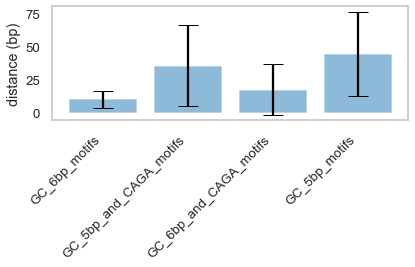

In [106]:


# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('distance (bp)')
ax.set_xticks(x_pos)
ax.set_xticklabels(distances)

#ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()


In [110]:
plot_dict_df = pd.DataFrame()
plot_dict_df['distances'] = list(distance_between_all_GC_6bp_motifs_list+
pairwise_dist_GC_5bp_and_CAGA_motifs_list+
pairwise_dist_GC_6bp_and_CAGA_motifs_list+
pairwise_dist_GC_5bp_motifs_list)
plot_dict_df['label']= list(list(np.repeat('GC_6bp_motifs', len(distance_between_all_GC_6bp_motifs_list), axis=0))+
                           list(np.repeat('GC_5bp_and_CAGA', len(pairwise_dist_GC_5bp_and_CAGA_motifs_list), axis=0))+
                           list(np.repeat('GC_6bp_and_CAGA', len(pairwise_dist_GC_6bp_and_CAGA_motifs_list), axis=0))+
                           list(np.repeat('GC_5bp_motifs', len(pairwise_dist_GC_5bp_motifs_list), axis=0)))
plot_dict_df

,distances,label
0,4,GC_6bp_motifs
1,17,GC_6bp_motifs
2,7,GC_5bp_and_CAGA
3,24,GC_5bp_and_CAGA
4,1,GC_5bp_and_CAGA
5,29,GC_5bp_and_CAGA
6,15,GC_5bp_and_CAGA
7,86,GC_5bp_and_CAGA
8,25,GC_5bp_and_CAGA
9,11,GC_5bp_and_CAGA


In [ ]:
orig_cmap = plt.cm.Blues
colors = orig_cmap(np.linspace(min_val, max_val, n))
blue_cmap_dark = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

In [250]:
orig_cmap(colors)

array([[[0.23192618, 0.54565167, 0.76261438, 1.        ],
        [0.0840446 , 0.38506728, 0.66443676, 1.        ],
        [0.03137255, 0.29785467, 0.58237601, 1.        ],
        [0.03137255, 0.18823529, 0.41960784, 1.        ]],

       [[0.67681661, 0.81647059, 0.90237601, 1.        ],
        [0.26071511, 0.57384083, 0.77720877, 1.        ],
        [0.0840446 , 0.38506728, 0.66443676, 1.        ],
        [0.03137255, 0.18823529, 0.41960784, 1.        ]],

       [[0.88865821, 0.93313341, 0.97440984, 1.        ],
        [0.56705882, 0.76330642, 0.87101884, 1.        ],
        [0.19944637, 0.51317186, 0.74588235, 1.        ],
        [0.03137255, 0.18823529, 0.41960784, 1.        ]],

       [[0.94402153, 0.96856594, 0.99212611, 1.        ],
        [0.82297578, 0.88982699, 0.95275663, 1.        ],
        [0.54823529, 0.75297193, 0.86695886, 1.        ],
        [0.03137255, 0.18823529, 0.41960784, 1.        ]]])

In [ ]:
nner{“box”, “quartile”, “point”, “stick”, None}, optional

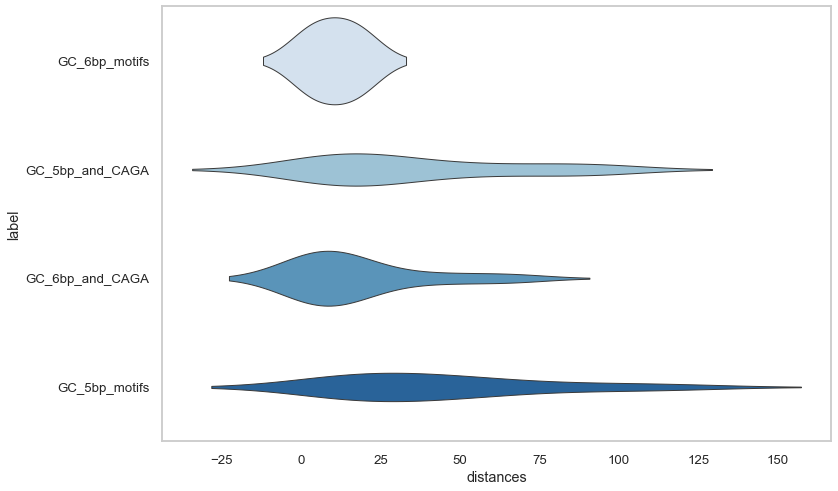

In [307]:
sns.set_context("talk", font_scale=0.8)
plt.figure(figsize=(12,8))
ax = sns.violinplot(y="label", x="distances", data=plot_dict_df, palette="Blues",inner=None,linewidth=1,edgecolor="white")#cornflowerbluelightskyblue
#sns.stripplot(x="label", y="distances", data=plot_dict_df,
#              color="grey", edgecolor="gray")
#sns.swarmplot(y="label", x="distances", data=plot_dict_df, color="aliceblue",size=4)
# plt.savefig("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/figures/distance_08.png",
#           format='png',dpi=750)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

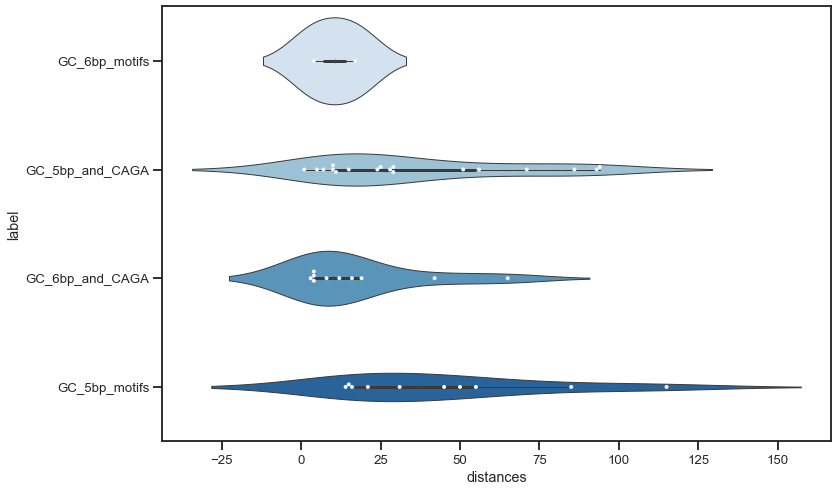

In [115]:
sns.set_context("talk", font_scale=0.8)
plt.figure(figsize=(12,8))
ax = sns.violinplot(y="label", x="distances", data=plot_dict_df, palette="Blues",linewidth=1,edgecolor="gray")#cornflowerbluelightskyblue
#sns.stripplot(x="label", y="distances", data=plot_dict_df,
#              color="grey", edgecolor="gray")
sns.swarmplot(y="label", x="distances", data=plot_dict_df, color="aliceblue",size=4)
plt.savefig("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/figures/distance_05.png",
            format='png',dpi=750)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [382]:
my_y_data= [distance_between_all_GC_6bp_motifs_list,
pairwise_dist_GC_5bp_and_CAGA_motifs_list,
pairwise_dist_GC_6bp_and_CAGA_motifs_list,
pairwise_dist_GC_5bp_motifs_list]
my_y_data

[[4, 17],
 [7, 24, 1, 29, 15, 86, 25, 11, 93, 10, 51, 28, 94, 56, 5, 71, 10, 29],
 [8, 4, 12, 3, 16, 42, 4, 65, 4, 19],
 [31, 50, 14, 15, 21, 85, 16, 115, 55, 45]]

In [383]:
from palmerpenguins import load_penguins
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()
# Get the species, sorted alphabetically
species = sorted(penguins["species"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [penguins[penguins["species"] == specie]["bill_length_mm"].values for specie in species]
y_data= my_y_data
# Create jittered version of "x" (which is only 0, 1, and 2)
# More about this in the bonus track!
jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

In [401]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3", "INDIGO"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = [0, 1, 2,3]

# Horizontal lines
HLINES = [40, 50, 60,70]

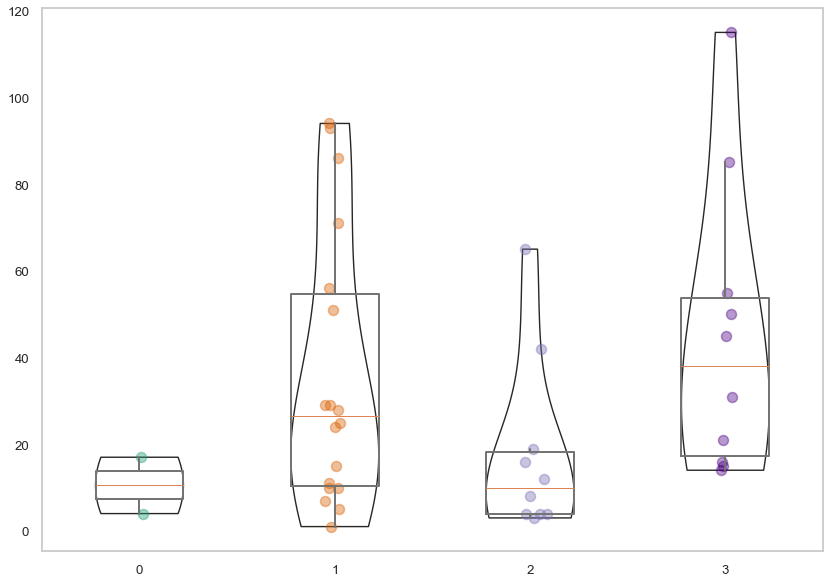

In [403]:
fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Horizontal lines that are used as scale reference
# for h in HLINES:
#     ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence
violins = ax.violinplot(
    my_y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins (remove fill, customize line, etc.)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    

# Add boxplots ---------------------------------------------------
# Note that properties about the median and the box are passed
# as dictionaries.

medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    #medianprops = medianprops,
    #meansprops = meansprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Add jittered dots ----------------------------------------------
for x, y, color in zip(x_jittered, my_y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.4)

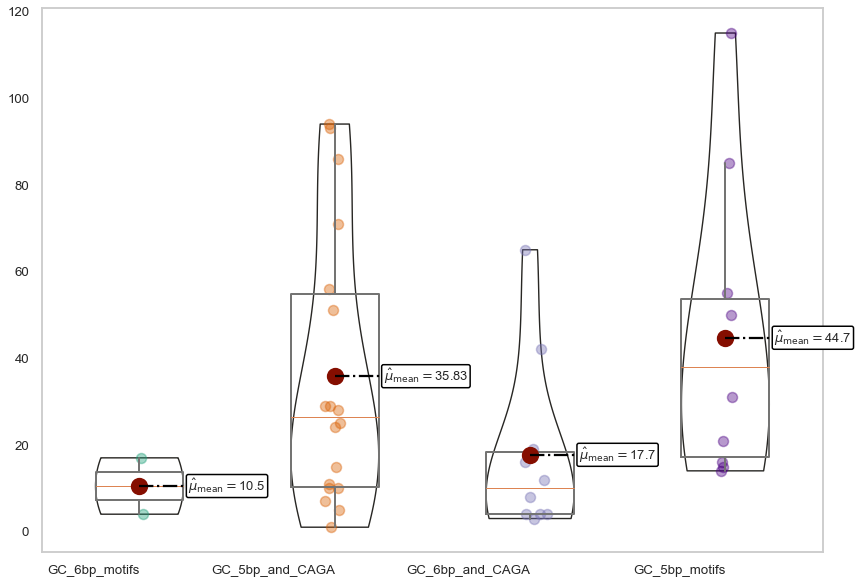

In [404]:
# Add mean value labels ------------------------------------------
means = [np.array(y).mean() for y in y_data]
for i, mean in enumerate(means):
    # Add dot representing the mean
    ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
    # Add line conecting mean value and its label
    ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    
    # Add mean value label.
    ax.text(
        i + 0.25,
        mean,
        r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
        fontsize=13,
        va="center",
        bbox = dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round",
            pad=0.15
        ),
        zorder=10 # to make sure the line is on top
    )

# Add multiple comparisons p-value for mean difference -----------
# Plot lines indicating what means are compared
# 'tick_len' gives the length of the tick on the end of each line

# tick_len = 0.25
# ax.plot([0, 0, 1, 1], [62.5 - tick_len, 62.5, 62.5, 62.5 - tick_len], c="black")
# ax.plot([0, 0, 2, 2], [65 - tick_len, 65, 65, 65 - tick_len], c="black")
# ax.plot([1, 1, 2, 2], [67.5 - tick_len, 67.5, 67.5, 67.5 - tick_len], c="black")

# # Add labels for the p-values
# label1 = r"$p_{\rm{Holm-corrected}}$ = 8.42e-14"
# label2 = r"$p_{\rm{Holm-corrected}}$ = 4.3e-14"
# label3 = r"$p_{\rm{Holm-corrected}}$ = 0.031"

# pad = 0.2
# ax.text(0.5, 62.5 + pad, label1, fontsize=11, va="bottom", ha="center")
# ax.text(1, 65 + pad, label2, fontsize=11, va="bottom", ha="center")
# ax.text(1.5, 67.5 + pad, label3, fontsize=11, va="bottom", ha="center")   
ax.set_xticklabels(['GC_6bp_motifs','GC_5bp_and_CAGA','GC_6bp_and_CAGA','GC_5bp_motifs'],  horizontalalignment='right')
fig

In [114]:
fig.savefig("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/200bp/figures/distance_NEW_2.png",
            format='png',dpi=750)